# NAME: JASPAL RAJPUROHIT
# DOMAIN: DATA SCIENCE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head()
data=data.drop(['car_ID','enginelocation'],axis=1)
data.shape

(205, 24)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9472\3918006026.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

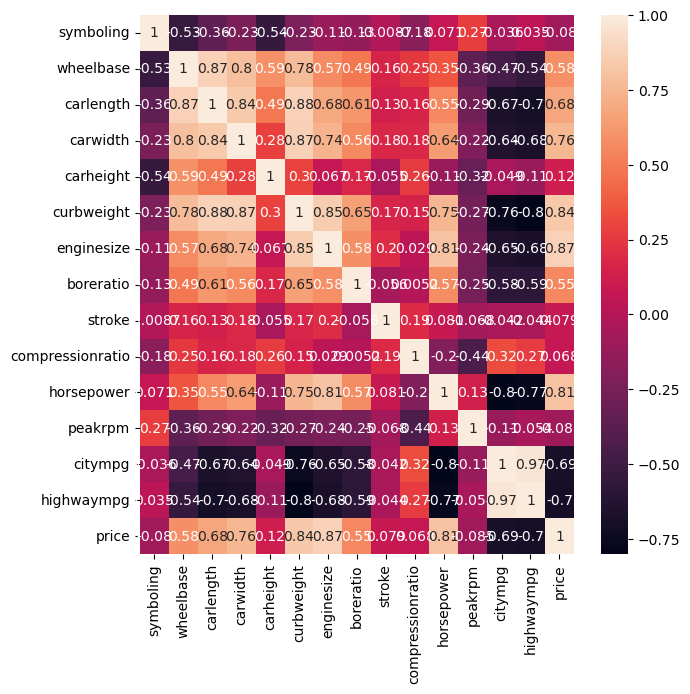

In [3]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)

In [4]:
data.isnull().sum()
data.duplicated().sum()

0

In [5]:
data1=data.copy()
features=[]
for i in range (data1.shape[1]):
    if data1.dtypes[i]=='object':
        features.append(data1.columns[i])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

le=LabelEncoder()
for i in features:
    data1[i]=le.fit_transform(data1[i])
data=data1.drop('CarName',axis=1)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20)
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [9]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((164, 23), (164,), (41, 23), (41,))

In [10]:
from sklearn.metrics import r2_score
y_predicted=lr.predict(x_test)

In [11]:
r2_score(y_test,y_predicted)

0.728583214960018

In [12]:
#method 2
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
y_train=np.array(y_train).reshape((-1,1))
y_train=ss.fit_transform(y_train)

In [13]:
x_test=ss.fit_transform(x_test)
y_test=np.array(y_test).reshape((-1,1))
y_test=ss.fit_transform(y_test)

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
r2_score(y_test,y_pred)

0.8141963464452551